每次迭代後的 x 值： [5.00000000e+00 2.00000000e+00 8.00000000e-01 3.20000000e-01
 1.28000000e-01 5.12000000e-02 2.04800000e-02 8.19200000e-03
 3.27680000e-03 1.31072000e-03 5.24288000e-04 2.09715200e-04
 8.38860800e-05 3.35544320e-05 1.34217728e-05 5.36870912e-06]


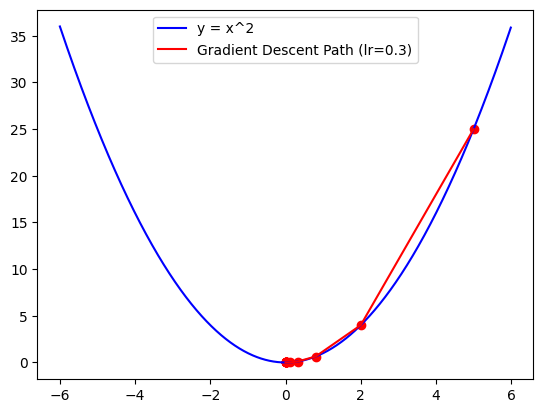

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 定義目標函數與導函數
# -----------------------------

# 目標函數：y = x^2
def func(x):
    return np.square(x)

# 目標函數的一階導數：dy/dx = 2x
def dfunc(x):
    return 2 * x


# -----------------------------
# 梯度下降法 (Gradient Descent)
# -----------------------------
def GD(x_start, df, epochs, lr):
    """
    梯度下降法：
    給定起始點與目標函數的一階導函數，透過多次迭代更新x，找到最小值

    參數說明：
    :param x_start: x 的起始值
    :param df: 目標函數的一階導函數
    :param epochs: 迭代次數（訓練週期數）
    :param lr: 學習率（Learning Rate）
    :return: 每次迭代後的 x 值陣列，長度為 epochs+1（包含起始點）
    """

    # 建立一個陣列，用來儲存每次更新後的 x 值
    xs = np.zeros(epochs + 1)

    # 初始化 x
    x = x_start
    xs[0] = x  # 第0次（起始點）紀錄

    # 進行梯度下降迴圈
    for i in range(epochs):
        dx = df(x)           # 計算目前點的導數（斜率）
        v = -dx * lr         # 更新方向 = 導數的反方向 × 學習率
        x += v               # 更新 x 值
        xs[i + 1] = x        # 紀錄新的 x 值

    return xs  # 回傳所有歷史 x 值


# -----------------------------
# 主程式執行區
# -----------------------------

# 起始點設定
x_start = 5
# 迭代次數
epochs = 15
# 學習率
lr = 0.3

# 執行梯度下降法
x = GD(x_start, dfunc, epochs, lr=lr)
print("每次迭代後的 x 值：", x)
# 預期輸出範例：
# [5.    2.    0.8   0.32   0.128  0.0512 ...]

# -----------------------------
# 視覺化結果
# -----------------------------

# 建立 x 軸範圍 (-6 ~ 6)
t = np.arange(-6.0, 6.0, 0.01)

# 繪製 y = x^2 曲線（藍色）
plt.plot(t, func(t), c='b', label='y = x^2')

# 繪製梯度下降過程（紅線）
plt.plot(x, func(x), c='r', label='Gradient Descent Path (lr={})'.format(lr))

# 標出每次更新的位置（紅色點）
plt.scatter(x, func(x), c='r')

# 顯示圖例
plt.legend()

# 顯示圖形
plt.show()
